In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
from datetime import *
import statsmodels.tsa.stattools as ts
import arch 

In [2]:
os.chdir(r'C:\Users\bj\Desktop\刘泽丹\Code')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
amt = pd.read_csv('amt.csv',index_col=0,date_parser=dateparse)
amt.columns = [int(i) for i in amt.columns]

os.chdir(r'C:\Users\bj\Desktop\刘泽丹\Code')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y%m%d')
corr = pd.read_csv('10_zz500members_corr.csv',header=None,index_col=0,date_parser=dateparse)[1]
zzIcData = pd.read_csv('zz500_from_db.csv')
zzIcData.columns = [int(i) for i in zzIcData.columns]
zzIcData[1] = [date.fromordinal(int(i)-366) for i in zzIcData[1]]
zzIcData.set_index(1,inplace=True)
zz500 = (zzIcData[5]/zzIcData[5].shift(1) - 1).dropna()
corr_diff = corr.diff().dropna()
zz500 = zz500.loc[corr_diff.index]
zz500_cumprod = (zz500+1).cumprod()
np.corrcoef(corr_diff,zz500)

fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(corr,lags = 50,ax=ax1)

In [3]:
data =amt[300310].replace(0,np.nan).dropna()[-200:]

In [4]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(data, lamb=1600)

In [5]:
mod_ucarima = sm.tsa.UnobservedComponents(data, 'rwalk', autoregressive=4)
res_ucarima = mod_ucarima.fit(method='powell', disp=False)
#print(res_ucarima.summary())

In [6]:
mod_uc = sm.tsa.UnobservedComponents(data, 'rwalk',cycle=True, stochastic_cycle=True, damped_cycle=True)
res_uc = mod_uc.fit(method='powell', disp=False)
res_uc = mod_uc.fit(res_uc.params, disp=False)
#print(res_uc.summary())

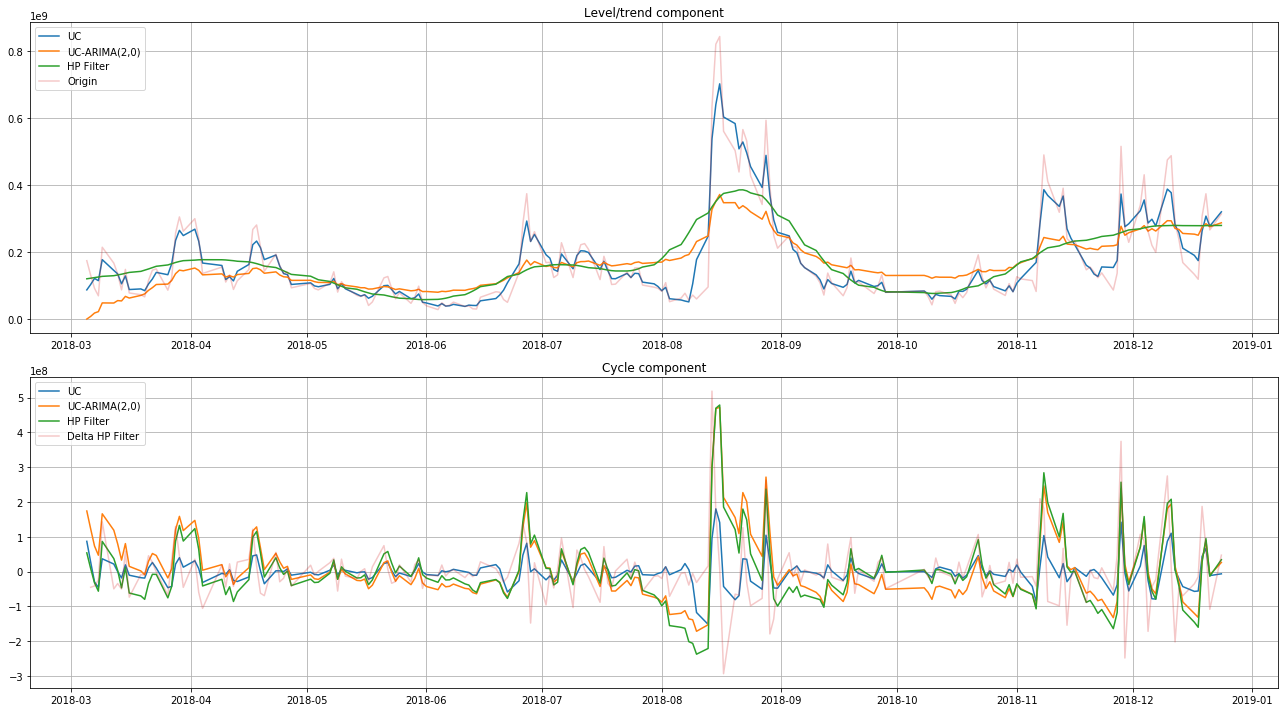

In [8]:
fig, axes = plt.subplots(2, figsize=(18,10));
axes[0].set(title='Level/trend component')
axes[0].plot(data.index, res_uc.level.smoothed, label='UC')
axes[0].plot(data.index, res_ucarima.level.smoothed, label='UC-ARIMA(2,0)')
axes[0].plot(hp_trend, label='HP Filter')
axes[0].plot(data, label='Origin',alpha=0.25)
axes[0].legend(loc='upper left')
axes[0].grid()

axes[1].set(title='Cycle component')
axes[1].plot(data.index, res_uc.cycle.smoothed, label='UC')
axes[1].plot(data.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')
axes[1].plot(hp_cycle, label='HP Filter')
axes[1].plot(hp_cycle.diff(), label='Delta HP Filter', alpha = 0.25)
axes[1].legend(loc='upper left')
axes[1].grid()

fig.tight_layout();

In [ ]:
data = hp_cycle

In [ ]:
ts.adfuller(data)

In [ ]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(data,lags = 20,ax=ax1)

In [ ]:
arma_mod = sm.tsa.ARMA(data,ts.arma_order_select_ic(data)['bic_min_order']).fit()

In [ ]:
predict_sunspots = arma_mod.predict('2018-10-08', '2018-12-24', dynamic=False)
fig, ax = plt.subplots(figsize=(22, 6))
ax = hp_cycle.plot(ax=ax,marker='.')
predict_sunspots.plot(ax=ax,marker='.')
ax.plot(dateparse('20181225'),arma_mod.forecast(1)[0][0],'*')
plt.show()

In [ ]:
data = hp_trend

In [ ]:
arma_mod = sm.tsa.ARMA(data,ts.arma_order_select_ic(data)['bic_min_order']).fit()

In [ ]:
predict_sunspots = arma_mod.predict('2018-10-08', '2018-12-24', dynamic=False)
#print(predict_sunspots)
fig, ax = plt.subplots(figsize=(22, 6))
ax = data.plot(ax=ax,marker='.')
predict_sunspots.plot(ax=ax,marker='.')
ax.plot(dateparse('20181225'),arma_mod.forecast(1)[0][0],'*')
plt.show()